In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from mpl_toolkits.mplot3d import Axes3D

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import Data

data = pd.read_csv('HR_comma_sep.csv')
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

# Cleaning and Pre-Processing - Oliver 

In [10]:
data.isnull().sum() 

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [11]:
data.isna().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [12]:
# no NULL values, so no further steps needed

# Data Exploration - Alex

In [13]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [14]:
labels = 'Stayed at Company', 'Left the Company'
sizes = [11428/14999, 3571/14999]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45)
ax1.axis('equal')  
plt.title('Employees at the Company')
plt.show()

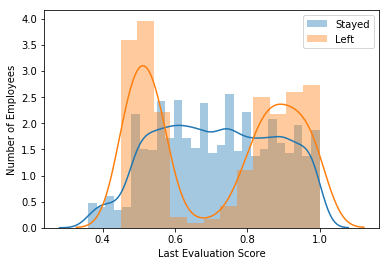

In [15]:
here = data.loc[data['left']==0] #all the people still at the company
gone = data.loc[data['left']==1] #all the people who left the company

sns.distplot(here['last_evaluation'], label = 'Stayed') 
sns.distplot(gone['last_evaluation'], label = 'Left').set(
            xlabel = 'Last Evaluation Score',
            ylabel = 'Number of Employees'
)
plt.legend()

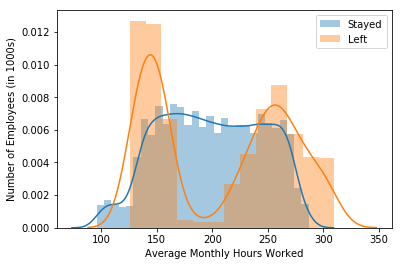

In [16]:
sns.distplot(here['average_montly_hours'], label = 'Stayed')
sns.distplot(gone['average_montly_hours'], label = 'Left').set(#green
            xlabel = 'Average Monthly Hours Worked',
            ylabel = 'Number of Employees (in 1000s)'
)
plt.legend()

In [17]:
sns.distplot(here['satisfaction_level'], label = 'Stayed')
sns.distplot(gone['satisfaction_level'], label = 'Left').set(
            xlabel = 'Satisfaction Level',
            ylabel = 'Number of Employees (in 1000s)'
)
plt.legend()

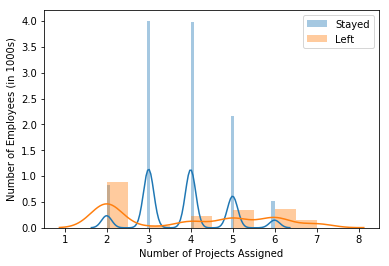

In [18]:
sns.distplot(here['number_project'], label = 'Stayed')
sns.distplot(gone['number_project'], label = 'Left').set(
            xlabel = 'Number of Projects Assigned',
            ylabel = 'Number of Employees (in 1000s)'
)
plt.legend()

[Text(0,0.5,'Average # of Hours Worked in a Month'),
 Text(0.5,0,'Stayed or Left')]

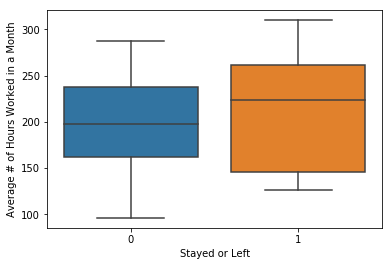

In [19]:
sns.boxplot(x = 'left', y ='average_montly_hours', data = data
           ).set(
                xlabel = 'Stayed or Left',
                ylabel = 'Average # of Hours Worked in a Month'
)

[Text(0,0.5,'Satisfaction Level'), Text(0.5,0,'Stayed or Left')]

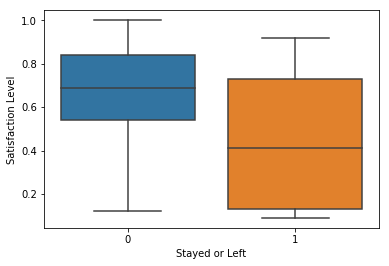

In [20]:
sns.boxplot(x = 'left', y = 'satisfaction_level', data = data
           ).set(
                xlabel = 'Stayed or Left',
                ylabel = 'Satisfaction Level'
)

[Text(0,0.5,'Last Evaluation Score'), Text(0.5,0,'Stayed or Left')]

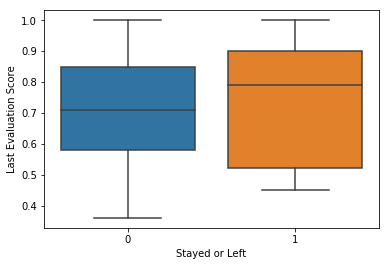

In [21]:
sns.boxplot(x = 'left', y = 'last_evaluation', data = data
           ).set(
                xlabel = 'Stayed or Left',
                ylabel = 'Last Evaluation Score'
)

[Text(0,0.5,'Number of Projects Assigned'), Text(0.5,0,'Stayed or Left')]

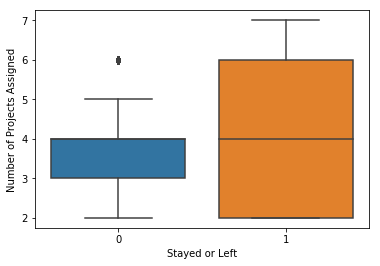

In [22]:
sns.boxplot(x = 'left', y = 'number_project', data = data
           ).set(
                xlabel = 'Stayed or Left',
                ylabel = 'Number of Projects Assigned'
)

In [23]:
here['time_spend_company'].value_counts()

3     4857
2     3191
4     1667
5      640
6      509
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [24]:
gone['time_spend_company'].value_counts()

3    1586
4     890
5     833
6     209
2      53
Name: time_spend_company, dtype: int64

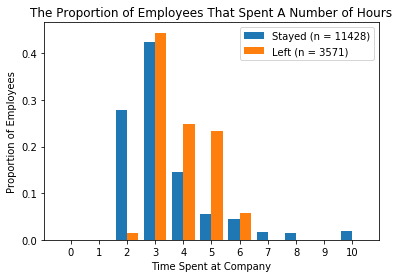

In [25]:
xpos = np.arange(11)
hours1 = [0,0,3191/11428,4857/11428,1667/11428,640/11428,509/11428,188/11428,162/11428,0,214/11428]
hours2 = [0,0,53/3571,1586/3571,890/3571,833/3571,209/3571,0,0,0,0]
plt.xticks(xpos, xpos)
plt.xlabel('Time Spent at Company')
plt.ylabel('Proportion of Employees')
plt.title('The Proportion of Employees That Spent A Number of Hours')
plt.bar(xpos - 0.2, hours1, width = 0.4, label = 'Stayed (n = 11428)')
plt.bar(xpos + 0.2, hours2, width = 0.4, label = 'Left (n = 3571)')
plt.legend()

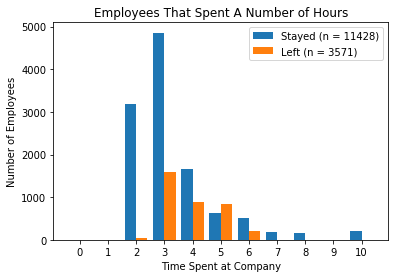

In [26]:
hours1 = [0,0,3191,4857,1667,640,509,188,162,0,214]
hours2 = [0,0,53,1586,890,833,209,0,0,0,0]
plt.xticks(xpos, xpos)
plt.xlabel('Time Spent at Company')
plt.ylabel('Number of Employees')
plt.title('Employees That Spent A Number of Hours')
plt.bar(xpos - 0.2, hours1, width = 0.4, label = 'Stayed (n = 11428)')
plt.bar(xpos + 0.2, hours2, width = 0.4, label = 'Left (n = 3571)')
plt.legend()

In [27]:
here['Department'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: Department, dtype: int64

In [28]:
gone['Department'].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: Department, dtype: int64

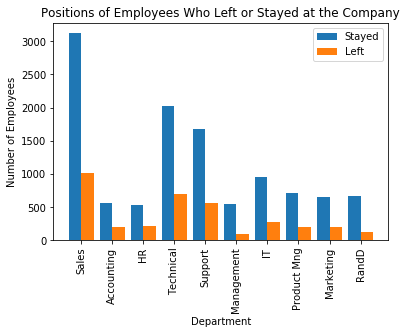

In [29]:
counts = [3126,563,524,2023,1674,539,954,704,655,666]
counts2 = [1014,204,215,697,555,91,273,198,203,121]
xpos = np.arange(10)
positions = ['Sales', 'Accounting', 'HR', 'Technical', 'Support', 'Management', 'IT',
 'Product Mng', 'Marketing', 'RandD']
plt.xticks(xpos, positions, rotation = 90)
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Positions of Employees Who Left or Stayed at the Company')
plt.bar(xpos-0.2, counts, width = 0.4, label = 'Stayed')
plt.bar(xpos+0.2, counts2, width = 0.4, label = 'Left')
plt.legend()

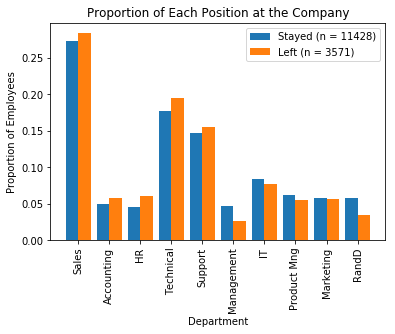

In [30]:
counts = [3126/11428,563/11428,524/11428,2023/11428,1674/11428,539/11428,954/11428,704/11428,655/11428,666/11428]
counts2 = [1014/3571,204/3571,215/3571,697/3571,555/3571,91/3571,273/3571,198/3571,203/3571,121/3571]
xpos = np.arange(10)
positions = ['Sales', 'Accounting', 'HR', 'Technical', 'Support', 'Management', 'IT',
 'Product Mng', 'Marketing', 'RandD']
plt.xticks(xpos, positions, rotation = 90)
plt.xlabel('Department')
plt.ylabel('Proportion of Employees')
plt.title('Proportion of Each Position at the Company')
plt.bar(xpos-0.2, counts, width = 0.4, label = 'Stayed (n = 11428)')
plt.bar(xpos+0.2, counts2, width = 0.4, label = 'Left (n = 3571)')
plt.legend()

In [31]:
here['salary'].value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

In [32]:
gone['salary'].value_counts()

low       2172
medium    1317
high        82
Name: salary, dtype: int64

In [33]:
groups = ['Low', 'Medium', 'High']
count_here = [5144/11428,5129/11428,1155/11428]
count_gone = [2172/3571,1317/3571,82/3571]
xpos = np.arange(len(groups))
plt.xticks(xpos, groups)
plt.xlabel('Distribution of Salaries')
plt.ylabel('Proportion of Employees')
plt.title('Salary of Employees')
plt.bar(xpos-0.2, count_here, width = 0.4, label = 'Stayed (n = 11428)')
plt.bar(xpos+0.2, count_gone, width = 0.4, label = 'Left (n = 3571)')
plt.legend()

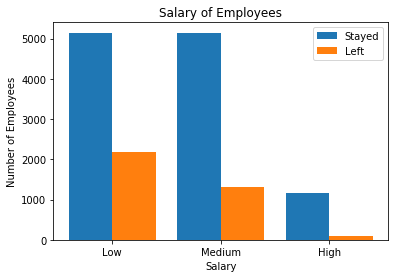

In [34]:
groups = ['Low', 'Medium', 'High']

count_here = [5144,5129,1155]
count_gone = [2172,1317,82]
xpos = np.arange(len(groups))
plt.xticks(xpos, groups)
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.title('Salary of Employees')
plt.bar(xpos-0.2, count_here, width = 0.4, label = 'Stayed')
plt.bar(xpos+0.2, count_gone, width = 0.4, label = 'Left')
plt.legend()

In [35]:
here['promotion_last_5years'].value_counts()

0    11128
1      300
Name: promotion_last_5years, dtype: int64

In [36]:
gone['promotion_last_5years'].value_counts()

0    3552
1      19
Name: promotion_last_5years, dtype: int64

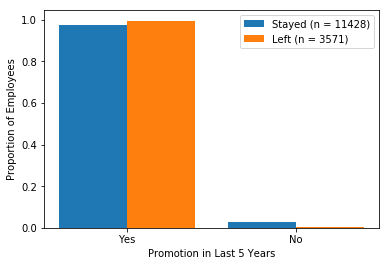

In [37]:
xpos = np.arange(2)
plt.xticks(xpos, ['Yes', 'No'])
plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Proportion of Employees')
plt.bar(xpos-0.2, [11128/11428,300/11428], width = 0.4, label = 'Stayed (n = 11428)')
plt.bar(xpos+0.2, [3552/3571, 19/3571], width = 0.4, label = 'Left (n = 3571)')
plt.legend()

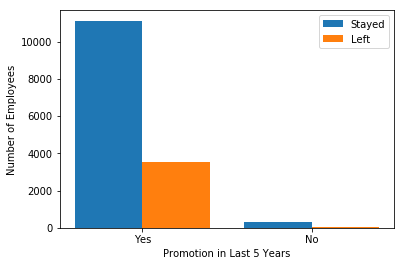

In [38]:
xpos = np.arange(2)
plt.xticks(xpos, ['Yes', 'No'])
plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Number of Employees')
plt.bar(xpos-0.2, [11128,300], width = 0.4, label = 'Stayed')
plt.bar(xpos+0.2, [3552,19], width = 0.4, label = 'Left')
plt.legend()

In [39]:
here['Work_accident'].value_counts()

0    9428
1    2000
Name: Work_accident, dtype: int64

In [40]:
gone['Work_accident'].value_counts()

0    3402
1     169
Name: Work_accident, dtype: int64

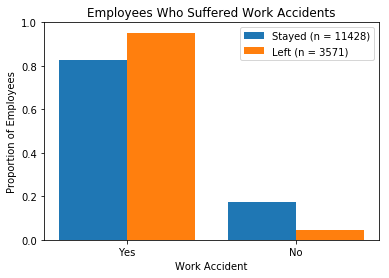

In [41]:
xpos = np.arange(2)
plt.xticks(xpos, ['Yes', 'No'])
plt.xlabel('Work Accident')
plt.ylabel('Proportion of Employees')
plt.title('Employees Who Suffered Work Accidents')
plt.bar(xpos-0.2, [9428/11428,2000/11428], width = 0.4, label = 'Stayed (n = 11428)')
plt.bar(xpos+0.2, [3402/3571,169/3571], width = 0.4, label = 'Left (n = 3571)')
plt.legend()

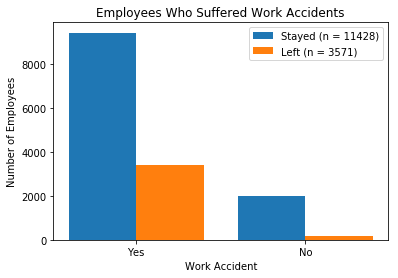

In [42]:
xpos = np.arange(2)
plt.xticks(xpos, ['Yes', 'No'])
plt.xlabel('Work Accident')
plt.ylabel('Number of Employees')
plt.title('Employees Who Suffered Work Accidents')
plt.bar(xpos-0.2, [9428,2000], width = 0.4, label = 'Stayed (n = 11428)')
plt.bar(xpos+0.2, [3402,169], width = 0.4, label = 'Left (n = 3571)')
plt.legend()

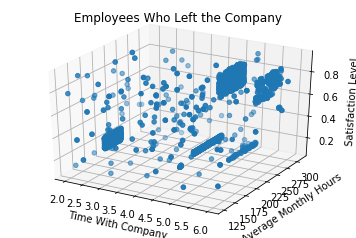

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(gone['time_spend_company'], gone['average_montly_hours'], gone['satisfaction_level'], marker = 'o')

ax.set_xlabel('Time With Company')
ax.set_ylabel('Average Monthly Hours')
ax.set_zlabel('Satisfaction Level')
plt.title('Employees Who Left the Company')
plt.show()

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(here['time_spend_company'], here['average_montly_hours'], here['satisfaction_level'], marker = 'o')

ax.set_xlabel('Time With Company')
ax.set_ylabel('Average Monthly Hours')
ax.set_zlabel('Satisfaction Level')
plt.title('Employees Who Stayed at the Company')
plt.show()

# Data Splitting and Encoding - Casey

In [5]:
from sklearn.preprocessing import LabelEncoder

labelendoder_x = LabelEncoder()

for column in ['Department', 'salary']:
    data[column] = labelendoder_x.fit_transform(data[column])

data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  Department  \
0                   3              0     1                      0           7   
1                   6              0     1                      0           7   
2                   4              0     1                      0           7   
3                   5              0     1                      0           7   
4                   3              0     1                      0           7   

   salary  
0       1  
1       2  
2       2  
3       1  
4       1

In [8]:
from sklearn.model_selection import train_test_split
df = data[['satisfaction_level',
         'last_evaluation',
         'number_project',
         'average_montly_hours',
         'time_spend_company',
         'Work_accident',
         'promotion_last_5years',
         'Department',
         'salary',
         'left'
        ]]
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  Department  \
0                   3              0                      0           7   
1                   6              0                      0           7   
2                   4              0                      0           7   
3                   5              0                      0           7   
4                   3              0                      0           7   

   salary  left  
0       1     1  
1       2     1  
2       2     1  
3       1     1  
4       1     1

In [ ]:
# The following 2 parts are how we split the data
# Running this part will split the data again
# Marked as a comment so we could include, but not mess up data
'''
features = df.iloc[ :, :-1]
label = df.iloc[ :, -1:]

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)
'''

In [ ]:
# Running this part will make four new CSVs with different 
# values from the test-train data we used
'''
x_train.to_csv('x_train.csv')
y_train.to_csv('y_train.csv')
x_test.to_csv('x_test.csv')
y_test.to_csv('y_test.csv')
'''

In [5]:
# Import pre-split data

X_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

# Convert labels to np arrays

label = np.array(y_train['left'].to_list())
y_test = np.array(y_test['left'].to_list())

In [6]:
# Prep models

logreg = LogisticRegression(max_iter = 300)
scaler = StandardScaler()
clf = RandomForestClassifier(n_estimators=100)
model = GaussianNB()

# Models

In [41]:
# Define Functions 

def create_features(df_name): #Casey
    '''
    this function takes the features and converts them into acceptable format for ML models
    '''   
    
    satisfaction_level = df_name['satisfaction_level'].to_list()
    last_evaluation = df_name['last_evaluation'].to_list()
    number_project = df_name['number_project'].to_list()
    average_montly_hours = df_name['average_montly_hours'].to_list()
    time_spend_company = df_name['time_spend_company'].to_list()
    Work_accident = df_name['Work_accident'].to_list()
    promotion_last_5years = df_name['promotion_last_5years'].to_list()
    Department = df_name['Department'].to_list()
    salary = df_name['salary'].to_list()

    features = np.column_stack((
        satisfaction_level,
        last_evaluation,
        number_project,
        average_montly_hours,
        time_spend_company,
        Work_accident,
        promotion_last_5years,
        Department,
        salary
    ))
    
    return features

def get_accuracies(x_train, y_train, x_test, y_test, test_name):
    '''
    this function returns accuracies for the four ML models to determine the best performer
    '''
    
    accuracies = []
    
    # logistic regression - Alex
    
    logreg = LogisticRegression(max_iter = 300)
    logreg.fit(x_train, y_train)
    y_pred = logreg.predict(x_test)
    accuracy_LR = np.sum(y_pred == y_test) / len(y_test)
    accuracy_LR 
    accuracies.append({'ML Model':'Logistic Regression', 'Accuracy - ' + test_name: accuracy_LR})
    
    print('Logistic Regression - done')
    
    # KNN - Oliver
    
    scaler.fit(x_train)
    X_scaled = scaler.transform(x_train)
    X2_scaled = scaler.transform(x_test)
    
    k_range = range(1, 30)

    score_list = []

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        score_list.append(
            {
                'k': k,
                'accuracy': metrics.accuracy_score(y_test, y_pred)
            }
        )
        
    score_df = pd.DataFrame(score_list).sort_values(by=['accuracy', 'k'], ascending=[False, True])
    #print(score_df)
    best = score_df['k'].to_list()[0]
    
    print('Best KNN Neighbors: ' + str(best))
    
    knn = KNeighborsClassifier(n_neighbors = 6, metric = 'euclidean')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy_KNN = metrics.accuracy_score(y_test, y_pred)
    accuracies.append({'ML Model':'KNN', 'Accuracy - ' + test_name: accuracy_KNN})
    
    print('KNN - done')
    
    # Naive-Bayes - Casey
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    accuracy_NB = metrics.accuracy_score(y_test, y_pred) 
    accuracies.append({'ML Model':'Naive-Bayes', 'Accuracy - ' + test_name: accuracy_NB})
    
    print('Naive-Bayes - done')
    
    # Random Forest - Casey
    
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test) 
    accuracy_RF = metrics.accuracy_score(y_test, y_pred)
    accuracies.append({'ML Model':'Random Forest', 'Accuracy - ' + test_name: accuracy_RF})
    
    print('Random Forest - done')
    
    df = pd.DataFrame(accuracies)
    df = df.sort_values(by=['Accuracy - ' + test_name, 'ML Model'], ascending=[False, True])
    
    return df

In [42]:
# Get Accuracy for all features
#Casey
all_features = get_accuracies(X_train, label, X_test, y_test, 'All Features')
all_features
#ax_all_features = all_features.plot.bar(x='ML Model', y='Accuracy', rot=0)

Logistic Regression - done
Best KNN Neighbors: 2
KNN - done
Naive-Bayes - done
Random Forest - done


ML Model  Accuracy - All Features
3        Random Forest                 0.990444
1                  KNN                 0.943333
2          Naive-Bayes                 0.800667
0  Logistic Regression                 0.766222

# Dimension Reduction

In [9]:
# Dimension Reduction (Machine Learning)

sel_f = SelectKBest(f_classif, k=7)
x_train_f = sel_f.fit_transform(X_train, label)
print(sel_f.get_support())

[ True False  True  True  True  True  True  True False]


In [10]:
X_train_reduced = X_train.drop(columns = ['last_evaluation', 'salary'])
X_test_reduced = X_test.drop(columns = ['last_evaluation', 'salary'])

X_train_reduced.head()

satisfaction_level  number_project  average_montly_hours  \
0                0.53               2                   135   
1                0.77               5                   256   
2                0.89               3                   149   
3                0.64               3                   156   
4                0.98               4                   151   

   time_spend_company  Work_accident  promotion_last_5years  Department  
0                   4              0                      0           9  
1                   3              0                      0           2  
2                   2              0                      0           8  
3                   6              1                      0           8  
4                   3              0                      0           7

In [43]:
# Get Accuracy for ML selected top 7 features

ML_dimensions = get_accuracies(X_train_reduced, label, X_test_reduced, y_test, 'ML Dimensions')
ML_dimensions

Logistic Regression - done
Best KNN Neighbors: 1
KNN - done
Naive-Bayes - done
Random Forest - done


ML Model  Accuracy - ML Dimensions
3        Random Forest                  0.989333
1                  KNN                  0.944222
2          Naive-Bayes                  0.794667
0  Logistic Regression                  0.766667

In [35]:
# Dimension Reduction with Applied Business Logic 

X_train_reduced_b = X_train.drop(columns = ['last_evaluation', 'Work_accident'])
X_test_reduced_b = X_test.drop(columns = ['last_evaluation', 'Work_accident'])

X_train_reduced_b.head()

satisfaction_level  number_project  average_montly_hours  \
0                0.53               2                   135   
1                0.77               5                   256   
2                0.89               3                   149   
3                0.64               3                   156   
4                0.98               4                   151   

   time_spend_company  promotion_last_5years  Department  salary  
0                   4                      0           9       2  
1                   3                      0           2       2  
2                   2                      0           8       2  
3                   6                      0           8       1  
4                   3                      0           7       2

In [44]:
business_dimensions = get_accuracies(X_train_reduced_b, label, X_test_reduced_b, y_test, 'Business Dimensions')
business_dimensions

Logistic Regression - done
Best KNN Neighbors: 1
KNN - done
Naive-Bayes - done
Random Forest - done


ML Model  Accuracy - Business Dimensions
3        Random Forest                        0.987778
1                  KNN                        0.940444
2          Naive-Bayes                        0.831556
0  Logistic Regression                        0.764000

In [14]:
all_tests = pd.concat([all_features, ML_dimensions, business_dimensions], axis=1, join='inner')
all_tests

ML Model  Accuracy - All Features             ML Model  \
3        Random Forest                 0.990889        Random Forest   
1                  KNN                 0.953111                  KNN   
2          Naive-Bayes                 0.800667          Naive-Bayes   
0  Logistic Regression                 0.766222  Logistic Regression   

   Accuracy - ML Dimensions             ML Model  \
3                  0.988222        Random Forest   
1                  0.955111                  KNN   
2                  0.794667          Naive-Bayes   
0                  0.766667  Logistic Regression   

   Accuracy - Business Dimensions  
3                        0.988000  
1                        0.951556  
2                        0.831556  
0                        0.764000

In [45]:
ypos = np.arange(4)
all_feat = [0.7662, 0.9433, 0.8006, 0.9907]
ML_dim = [0.7667, 0.9404, 0.7947, 0.9880]
Busi_dim = [0.7640, 0.9531, 0.8316, 0.9880]
plt.yticks(ypos, ['Logistic Regression', 'K-Nearest Neighbors', 'Naive-Bayes', 'Random Forest Classifier'])
plt.ylabel('Model Type')
plt.xlabel('Accuracy')
plt.barh(ypos-0.3, all_feat, height = 0.3, label = 'All Features')
plt.barh(ypos, ML_dim, height = 0.3, label = 'Reduced Features')
plt.barh(ypos+0.3, Busi_dim, height = 0.3, label = 'Business Features')
plt.legend(bbox_to_anchor=(1.4,0.25), ncol = 1)

# Confusion Matrices

In [16]:
# Logistic Regression - Alex

logreg = LogisticRegression(max_iter = 300)
logreg.fit(X_train_reduced_b, label)
    
y_pred_LR = logreg.predict(X_test_reduced_b)

cnf_matrix_LR = metrics.confusion_matrix(y_test, y_pred_LR)
cnf_matrix_LR

class_names=['Stayed at the Company','Left the Company'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix_LR, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,15,'Predicted label')

Text(0,0.5,'Testing Accuracy')

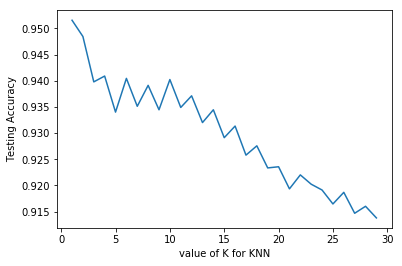

In [17]:
# KNN - Oliver

k_range = range(1,30)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_reduced_b, label)
    y_pred_KNN=knn.predict(X_test_reduced_b)
    scores[k] = metrics.accuracy_score(y_test,y_pred_KNN)
    scores_list.append(metrics.accuracy_score(y_test,y_pred_KNN))

plt.plot(k_range,scores_list)
plt.xlabel("value of K for KNN")
plt.ylabel("Testing Accuracy")

Text(0.5,15,'Predicted label')

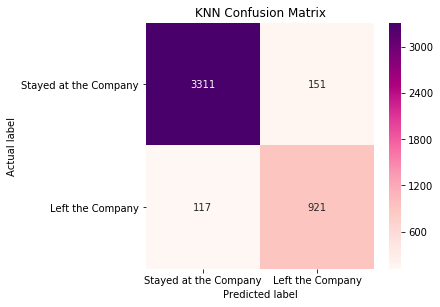

In [18]:
scaler.fit(X_train_reduced_b)
X_train_scaled = scaler.transform(X_train_reduced_b)
X_test_scaled = scaler.transform(X_test_reduced_b)

knn = KNeighborsClassifier(n_neighbors = 6, metric = 'euclidean')
knn.fit(X_train_reduced_b, label)
y_pred_KNN = knn.predict(X_test_reduced_b)

cnf_matrix_KNN = metrics.confusion_matrix(y_test, y_pred_KNN)
cnf_matrix_KNN

class_names=['Stayed at the Company','Left the Company'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix_KNN, annot=True, cmap="RdPu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('KNN Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,15,'Predicted label')

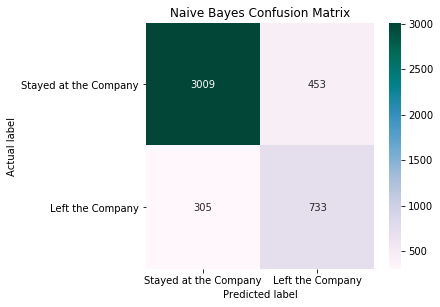

In [19]:
# Naive-Bayes - Casey

model.fit(X_train_reduced_b, label)

y_pred_NB = model.predict(X_test_reduced_b)

cnf_matrix_NB = metrics.confusion_matrix(y_test, y_pred_NB)
cnf_matrix_NB

class_names=['Stayed at the Company','Left the Company'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix_NB, annot=True, cmap="PuBuGn" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Naive Bayes Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,15,'Predicted label')

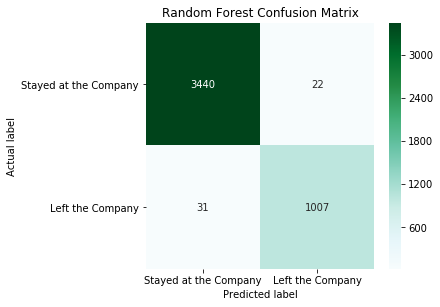

In [20]:
# Random Forest - Casey

clf.fit(X_train_reduced_b, label)

y_pred2 = clf.predict(X_test_reduced_b)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred2)
cnf_matrix

class_names=['Stayed at the Company','Left the Company'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="BuGn" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
# identify the top 3 features by importance

sel_f = SelectKBest(f_classif, k=1)
x_train_f = sel_f.fit_transform(X_train_reduced_b, label)
print(sel_f.get_support())

[False  True False False False False False False]


In [47]:
sel_f = SelectKBest(f_classif, k=2)
x_train_f = sel_f.fit_transform(X_train_reduced_b, label)
print(sel_f.get_support())

[False  True False False  True False False False]


In [48]:
sel_f = SelectKBest(f_classif, k=3)
x_train_f = sel_f.fit_transform(X_train_reduced_b, label)
print(sel_f.get_support())

[ True  True False False  True False False False]


In [49]:
best_features = [{'Feature': 'satisfaction_level', 'Rank': 1}, 
                 {'Feature': 'time_spend_company', 'Rank': 2},
                 {'Feature': 'promotion_last_5years', 'Rank': 3}]

best_features_df = pd.DataFrame(best_features)
best_features_df

Feature  Rank
0     satisfaction_level     1
1     time_spend_company     2
2  promotion_last_5years     3